<a href="https://colab.research.google.com/github/gusmaomarcos/portfolio/blob/main/reator_supervisorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O propósito deste algoritmo é o de produzir um relatório de diagnóstico rápido com informações de parâmetros obtidas de supervisórios de reatores de vulcanização. Os gráficos permitem analisar anomalias de processo, a fim de se identificar possíveis problemas durante os turnos de produção da fábrica.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
agitador = pd.read_csv('Velocidade-Mist110.csv', delimiter=';',
                       on_bad_lines='skip')
temperatura = pd.read_csv('Temperatura-Mist110.csv', delimiter=';', encoding='latin-1',
                          on_bad_lines='skip')
vazao = pd.read_csv('Litros-Mist110.csv', delimiter=';',
                    on_bad_lines='skip')
corrente = pd.read_csv('Corrente-Mist110.csv', delimiter=';',
                       on_bad_lines='skip')

In [3]:
temperatura = temperatura[temperatura['Validity'] == 1]
temperatura['TimeString'] = pd.to_datetime(temperatura['TimeString'], format="%d/%m/%Y %H:%M:%S")
temperatura = temperatura.sort_values(by='TimeString')
temperatura['VarValue'] = temperatura['VarValue'].str.replace(',', '.').astype(float)

intervalo_inicio = temperatura['TimeString'].min()
intervalo_fim = temperatura['TimeString'].max()
print(f"Início da janela de análise: {intervalo_inicio}")
print(f"Fim da janela de análise: {intervalo_fim}\n")

diferenca = intervalo_fim - intervalo_inicio
print(f"A janela de análise é de: {diferenca}")

agitador = agitador[agitador['Validity'] == 1]
agitador['TimeString'] = pd.to_datetime(agitador['TimeString'], format="%d/%m/%Y %H:%M:%S")
agitador = agitador.sort_values(by='TimeString')
agitador['VarValue'] = agitador['VarValue'].str.replace(',', '.').astype(float)
agitador = agitador[(agitador['TimeString'] >= intervalo_inicio) & (agitador['TimeString'] <= intervalo_fim)]

corrente = corrente[corrente['Validity'] == 1]
corrente['TimeString'] = pd.to_datetime(corrente['TimeString'], format="%d/%m/%Y %H:%M:%S")
corrente = corrente.sort_values(by='TimeString')
corrente['VarValue'] = corrente['VarValue'].str.replace(',', '.').astype(float)
corrente = corrente[(corrente['TimeString'] >= intervalo_inicio) & (corrente['TimeString'] <= intervalo_fim)]

vazao = vazao[vazao['Validity'] == 1]
vazao['TimeString'] = pd.to_datetime(vazao['TimeString'], format="%d/%m/%Y %H:%M:%S")
vazao = vazao.sort_values(by='TimeString')
vazao['VarValue'] = vazao['VarValue'].str.replace(',', '.').astype(float)

Início da janela de análise: 2018-08-07 12:53:44
Fim da janela de análise: 2018-08-08 06:15:43

A janela de análise é de: 0 days 17:21:59


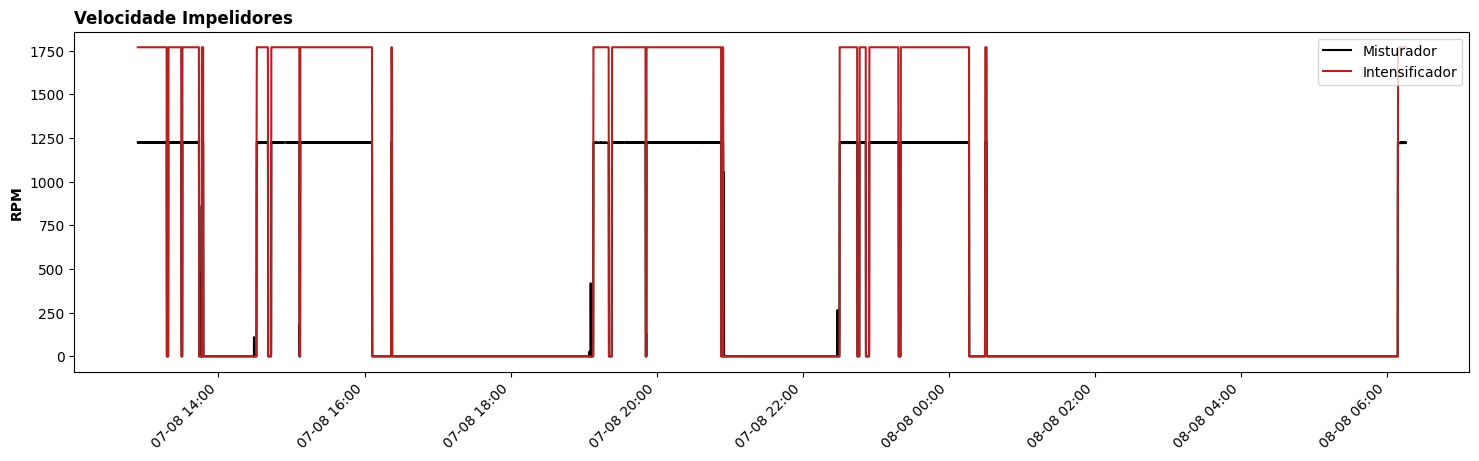

In [4]:
rpm_data_mist = agitador[agitador['VarName'] == 'RPM Misturador']
rpm_data_int = agitador[agitador['VarName'] == 'RPM Intensificador']
fig, ax = plt.subplots(figsize=(18, 5))
legenda = ['Misturador', 'Intensificador']
rpm_data_mist.plot(x='TimeString', y='VarValue', ax=ax, color='k')
rpm_data_int.plot(x='TimeString', y='VarValue', ax=ax, color='firebrick')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
plt.xticks(rotation=45, ha='right')

plt.title('Velocidade Impelidores', fontsize=12, loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('RPM', weight='bold')
plt.legend(legenda, loc='upper right')

plt.show()

fig.savefig('velocidade_imp.jpeg', bbox_inches='tight')

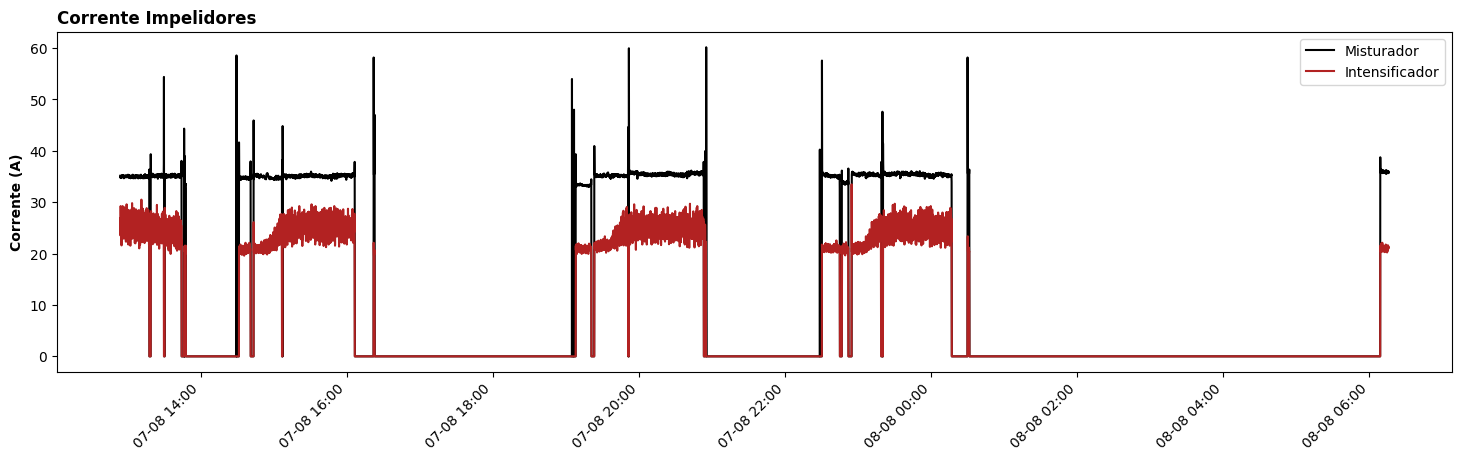

In [5]:
corr_data_mist = corrente[corrente['VarName'] == 'Corrente Misturador']
corr_data_int = corrente[corrente['VarName'] == 'Corrente Intensificador']
fig, ax = plt.subplots(figsize=(18, 5))
legenda = ['Misturador', 'Intensificador']
corr_data_mist.plot(x='TimeString', y='VarValue', ax=ax, color='k')
corr_data_int.plot(x='TimeString', y='VarValue', ax=ax, color='firebrick')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
plt.xticks(rotation=45, ha='right')

plt.title('Corrente Impelidores', fontsize=12, loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('Corrente (A)', weight='bold')
plt.legend(legenda, loc='upper right')

plt.show()

fig.savefig('corrente_imp.jpeg', bbox_inches='tight')

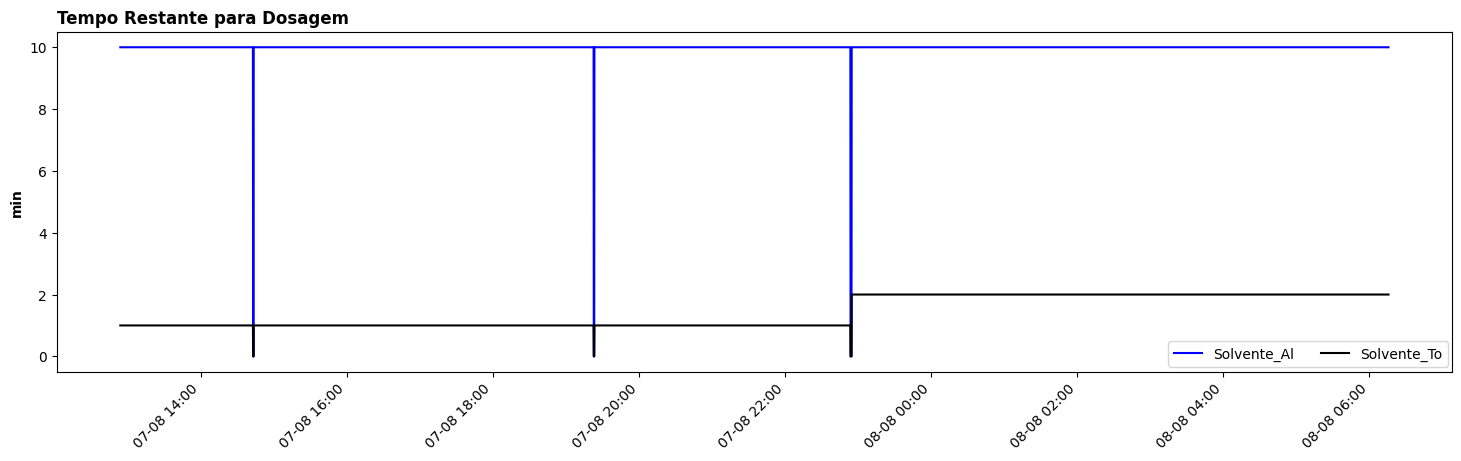

In [6]:
t_restante_alcool = vazao[vazao['VarName'] == 'Dados da IHM_Tempo Restante para Dosagem do Alcool em Minutos']
t_restante_solvente = vazao[vazao['VarName'] == 'Dados da IHM_Tempo Restante para Dosagem do Solvente em Minutos']

fig, ax = plt.subplots(figsize=(18, 5))

t_restante_alcool.plot(x='TimeString', y='VarValue', ax=ax, color='blue')
t_restante_solvente.plot(x='TimeString', y='VarValue', ax=ax, color='k')

legenda = ['Solvente_Al', 'Solvente_To']

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
plt.xticks(rotation=45, ha='right')

plt.title('Tempo Restante para Dosagem', fontsize=12, loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('min', weight='bold')
plt.legend(legenda, loc='upper center', bbox_to_anchor=(0.897, 0.11), ncol=2)

plt.show()

fig.savefig('tempo_solv.jpeg', bbox_inches='tight')

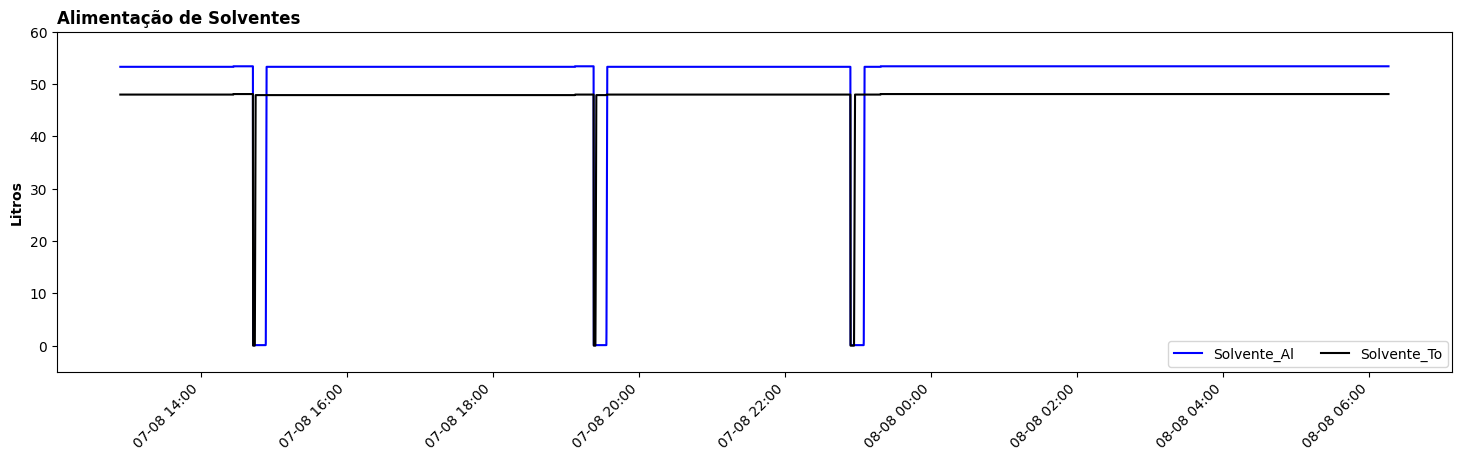

In [7]:
litros_alcool = vazao[vazao['VarName'] == 'Dados da IHM_Litros_alcool_leitura']
litros_solvente = vazao[vazao['VarName'] == 'Dados da IHM_Litros_CapaInicial_Leitura']

fig, ax = plt.subplots(figsize=(18, 5))

litros_alcool.plot(x='TimeString', y='VarValue', ax=ax, color='blue')
litros_solvente.plot(x='TimeString', y='VarValue', ax=ax, color='k')

legenda = ['Solvente_Al', 'Solvente_To']

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.set_ylim(-5, 60)
plt.xticks(rotation=45, ha='right')

plt.title('Alimentação de Solventes', fontsize=12, loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('Litros', weight='bold')
plt.legend(legenda, loc='upper center', bbox_to_anchor=(0.897, 0.11), ncol=2)

plt.show()

fig.savefig('alimentacao_solv.jpeg', bbox_inches='tight')

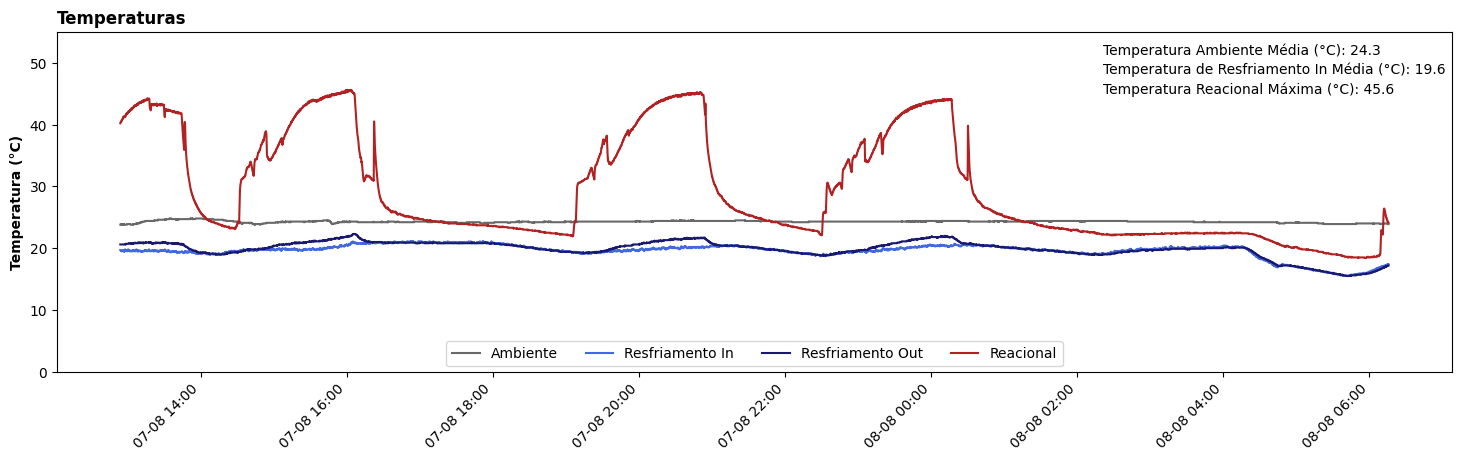

In [8]:
t_amb = temperatura[temperatura['VarName'] == 'Temperatura Ambiente']
t_resf_in = temperatura[temperatura['VarName'] == 'Temperatura Entrada Água']
t_resf_out = temperatura[temperatura['VarName'] == 'Temperatura Saída Água']
t_reacao = temperatura[temperatura['VarName'] == 'Temperatura Mistura']

t_amb_mean = t_amb['VarValue'].mean().round(1)
t_resf_in_mean = t_resf_in['VarValue'].mean().round(1)
t_reacao_max = t_reacao['VarValue'].max()

fig, ax = plt.subplots(figsize=(18, 5))

t_amb.plot(x='TimeString', y='VarValue', ax=ax, color='dimgray')
t_resf_in.plot(x='TimeString', y='VarValue', ax=ax, color='royalblue')
t_resf_out.plot(x='TimeString', y='VarValue', ax=ax, color='midnightblue')
t_reacao.plot(x='TimeString', y='VarValue', ax=ax, color='firebrick')

legenda = ['Ambiente', 'Resfriamento In', 'Resfriamento Out', 'Reacional']

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.set_ylim(0, 55)

ax.text(0.75, 0.82,
        f'Temperatura Ambiente Média (°C): {t_amb_mean}\n'
        f'Temperatura de Resfriamento In Média (°C): {t_resf_in_mean}\n'
        f'Temperatura Reacional Máxima (°C): {t_reacao_max}',
        fontsize=10, color='k', linespacing=1.4, transform=ax.transAxes)

plt.xticks(rotation=45, ha='right')

plt.title('Temperaturas', fontsize=12, loc='left', weight='bold')
plt.xlabel('')
plt.ylabel('Temperatura (°C)', weight='bold')
plt.legend(legenda, loc='upper center', bbox_to_anchor=(0.5, 0.11), ncol=4)

plt.show()

fig.savefig('temperaturas.jpeg', bbox_inches='tight')

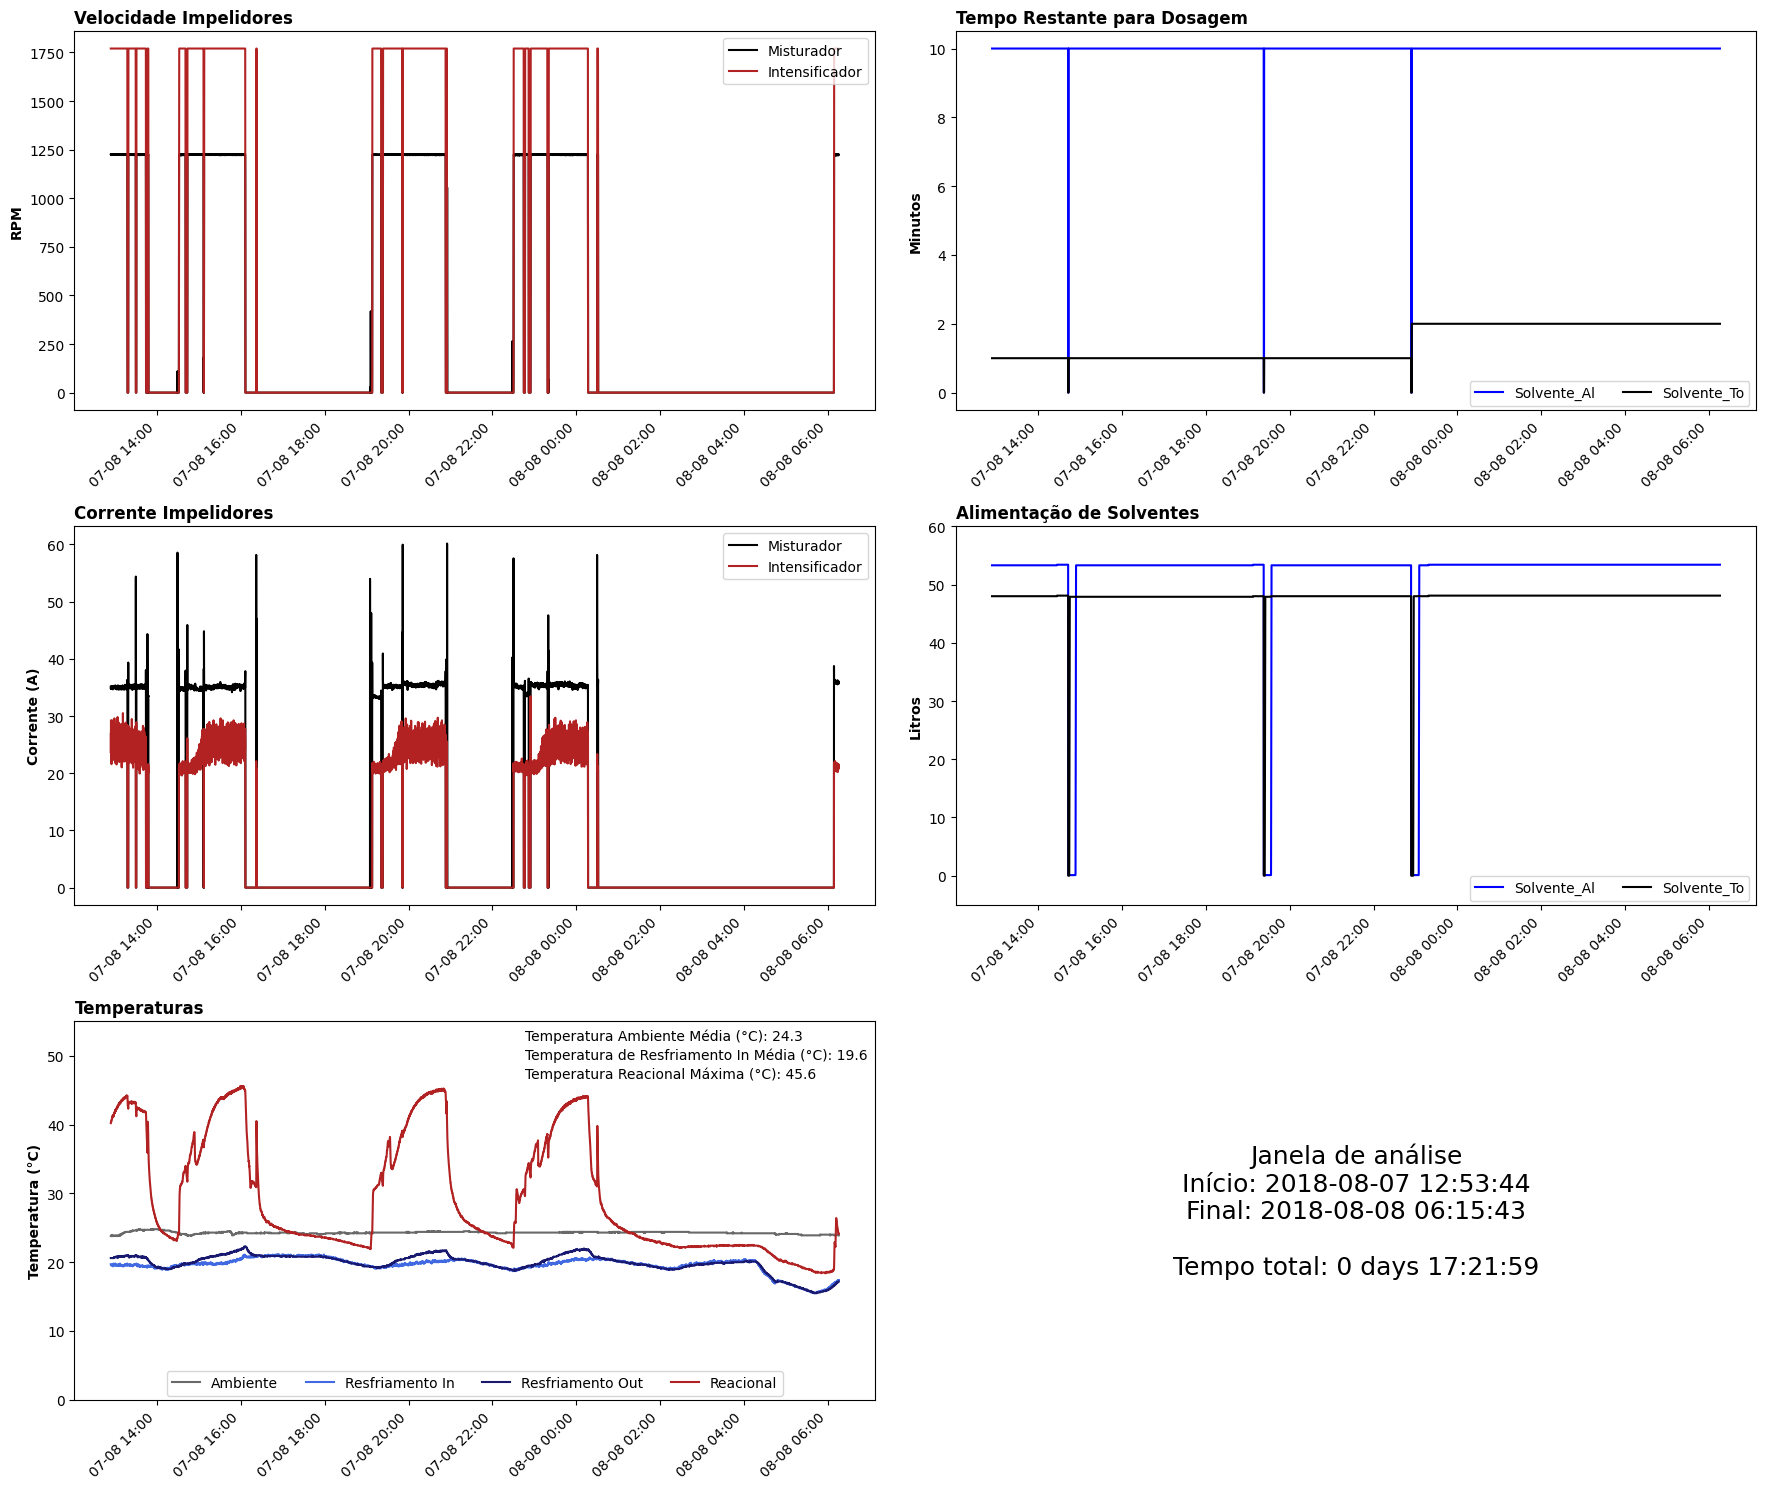

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
axes = axes.flatten()

# Velocidade Impelidores
rpm_data_mist = agitador[agitador['VarName'] == 'RPM Misturador']
rpm_data_int = agitador[agitador['VarName'] == 'RPM Intensificador']
legenda = ['Misturador', 'Intensificador']

rpm_data_mist.plot(x='TimeString', y='VarValue', ax=axes[0], color='k')
rpm_data_int.plot(x='TimeString', y='VarValue', ax=axes[0], color='firebrick')

axes[0].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Velocidade Impelidores', fontsize=12, loc='left', weight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('RPM', weight='bold')
axes[0].legend(legenda, loc='upper right')

# Corrente Impelidores
corr_data_mist = corrente[corrente['VarName'] == 'Corrente Misturador']
corr_data_int = corrente[corrente['VarName'] == 'Corrente Intensificador']

corr_data_mist.plot(x='TimeString', y='VarValue', ax=axes[2], color='k')
corr_data_int.plot(x='TimeString', y='VarValue', ax=axes[2], color='firebrick')

axes[2].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_title('Corrente Impelidores', fontsize=12, loc='left', weight='bold')
axes[2].set_xlabel('')
axes[2].set_ylabel('Corrente (A)', weight='bold')
axes[2].legend(legenda, loc='upper right')

# Tempo Restante para Dosagem
t_restante_alcool = vazao[vazao['VarName'] == 'Dados da IHM_Tempo Restante para Dosagem do Alcool em Minutos']
t_restante_solvente = vazao[vazao['VarName'] == 'Dados da IHM_Tempo Restante para Dosagem do Solvente em Minutos']

t_restante_alcool.plot(x='TimeString', y='VarValue', ax=axes[1], color='blue')
t_restante_solvente.plot(x='TimeString', y='VarValue', ax=axes[1], color='black')

legenda = ['Solvente_Al', 'Solvente_To']

axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Tempo Restante para Dosagem', fontsize=12, loc='left', weight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Minutos', weight='bold')
axes[1].legend(legenda, loc='upper center', bbox_to_anchor=(0.8166, 0.095), ncol=2)

# Alimentação de Solventes
litros_alcool = vazao[vazao['VarName'] == 'Dados da IHM_Litros_alcool_leitura']
litros_solvente = vazao[vazao['VarName'] == 'Dados da IHM_Litros_CapaInicial_Leitura']

litros_alcool.plot(x='TimeString', y='VarValue', ax=axes[3], color='blue')
litros_solvente.plot(x='TimeString', y='VarValue', ax=axes[3], color='black')

legenda = ['Solvente_Al', 'Solvente_To']

axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axes[3].set_ylim(-5, 60)
axes[3].tick_params(axis='x', rotation=45)
axes[3].set_title('Alimentação de Solventes', fontsize=12, loc='left', weight='bold')
axes[3].set_xlabel('')
axes[3].set_ylabel('Litros', weight='bold')
axes[3].legend(legenda, loc='upper center', bbox_to_anchor=(0.8166, 0.095), ncol=2)

# Temperaturas
t_amb = temperatura[temperatura['VarName'] == 'Temperatura Ambiente']
t_resf_in = temperatura[temperatura['VarName'] == 'Temperatura Entrada Água']
t_resf_out = temperatura[temperatura['VarName'] == 'Temperatura Saída Água']
t_reacao = temperatura[temperatura['VarName'] == 'Temperatura Mistura']

t_amb_mean = t_amb['VarValue'].mean().round(1)
t_resf_in_mean = t_resf_in['VarValue'].mean().round(1)
t_reacao_max = t_reacao['VarValue'].max()

t_amb.plot(x='TimeString', y='VarValue', ax=axes[4], color='dimgray')
t_resf_in.plot(x='TimeString', y='VarValue', ax=axes[4], color='royalblue')
t_resf_out.plot(x='TimeString', y='VarValue', ax=axes[4], color='midnightblue')
t_reacao.plot(x='TimeString', y='VarValue', ax=axes[4], color='firebrick')

legenda = ['Ambiente', 'Resfriamento In', 'Resfriamento Out', 'Reacional']

axes[4].xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
axes[4].set_ylim(0, 55)
axes[4].text(0.563, 0.85,
             f'Temperatura Ambiente Média (°C): {t_amb_mean}\n'
             f'Temperatura de Resfriamento In Média (°C): {t_resf_in_mean}\n'
             f'Temperatura Reacional Máxima (°C): {t_reacao_max}',
             fontsize=10, color='k', linespacing=1.4, transform=axes[4].transAxes)

axes[4].tick_params(axis='x', rotation=45)
axes[4].set_title('Temperaturas', fontsize=12, loc='left', weight='bold')
axes[4].set_xlabel('')
axes[4].set_ylabel('Temperatura (°C)', weight='bold')
axes[4].legend(legenda, loc='upper center', bbox_to_anchor=(0.5, 0.095), ncol=4)

# Janela de análise
analysis_text = ("Janela de análise\n"
                 f"Início: {intervalo_inicio}\n"
                 f"Final: {intervalo_fim}\n\n"
                 f"Tempo total: {diferenca}")

axes[5].axis('off')
axes[5].text(0.5, 0.5, analysis_text, fontsize=18, color='black',
             ha='center', va='center', transform=axes[5].transAxes)

plt.tight_layout()
plt.show()

with PdfPages('report.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')

fig.savefig('report.jpeg', bbox_inches='tight')